# 3D Scatterplot Demonstration

Code based on this heavyweight 'advanced matplotlib' [blogpost](https://medium.com/sfu-big-data/advanced-visualization-for-data-scientists-with-matplotlib-15c28863c41c)

In [1]:
# Import libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from mpl_toolkits.mplot3d import Axes3D

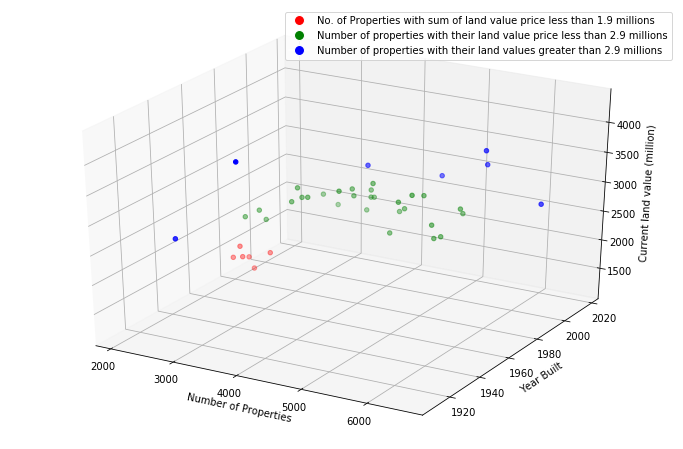

In [2]:
# Get the Property Tax Report dataset
# Dataset link: https://data.vancouver.ca/datacatalogue/propertyTax.htm
data = pd.read_csv('data/property_tax_report_2018.csv')


# Extract the columns and do some transformations
yearWiseAgg = data[['PID','CURRENT_LAND_VALUE']].groupby(data['YEAR_BUILT']).agg({'PID':'count','CURRENT_LAND_VALUE':'sum'})
yearWiseAgg = yearWiseAgg.reset_index().dropna()

# Get only records which have more than 2000 properties built per year
morethan2k = yearWiseAgg.query('PID>2000')


# Define colors as red, green, blue
colors = ['r', 'g', 'b']

# Get shape of dataframe
dflen = morethan2k.shape[0]

# Fetch land values from dataframe
lanvalues = (morethan2k['CURRENT_LAND_VALUE']/2e6).tolist()


# Create a list of colors for each point corresponding to x and y
c_list = []
for i,value in enumerate(lanvalues):
    if value>0 and value<1900:
        c_list.append(colors[0])
    elif value>=1900 and value<2900:
        c_list.append(colors[1])
    else:
        c_list.append(colors[2])


# Create figure object
fig = plt.figure(figsize=(12,8))

# Get the current axes, creating one if necessary.
ax = fig.gca(projection='3d')
        
# By using zdir='y', the y value of these points is fixed to the zs value 0
# and the (x,y) points are plotted on the x and z axes.
ax.scatter(morethan2k['PID'], morethan2k['YEAR_BUILT'], morethan2k['CURRENT_LAND_VALUE']/2e6,c=c_list)

# Set labels according to axis
plt.xlabel('Number of Properties')
plt.ylabel('Year Built')
ax.set_zlabel('Current land value (million)')

# Create customized legends 
legend_elements = [Line2D([0], [0], marker='o', color='w', label='No. of Properties with sum of land value price less than 1.9 millions',markerfacecolor='r', markersize=10),
                   Line2D([0], [0], marker='o', color='w', label='Number of properties with their land value price less than 2.9 millions',markerfacecolor='g', markersize=10),
                   Line2D([0], [0], marker='o', color='w', label='Number of properties with their land values greater than 2.9 millions',markerfacecolor='b', markersize=10)
                  ]

# Make legend
ax.legend(handles=legend_elements, loc='best')

plt.show()

## Rotate the 3D Plot
https://towardsdatascience.com/animations-with-matplotlib-d96375c5442c

In [8]:
# Get the data (csv file is hosted on the web)
url = 'https://python-graph-gallery.com/wp-content/uploads/volcano.csv'
data = pd.read_csv(url)
display(data.head())

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61
0,100,100,101,101,101,101,101,100,100,100,...,107,107,107,106,106,105,105,104,104,103
1,101,101,102,102,102,102,102,101,101,101,...,108,108,107,107,106,106,105,105,104,104
2,102,102,103,103,103,103,103,102,102,102,...,109,108,108,107,107,106,106,105,105,104
3,103,103,104,104,104,104,104,103,103,103,...,109,109,108,108,107,107,106,106,105,105
4,104,104,105,105,105,105,105,104,104,103,...,110,109,109,108,107,107,107,106,106,105


In [9]:
# Transform it to a long format
df=data.unstack().reset_index()
df.columns=["X","Y","Z"]
display(df.head())
print(df.info())

,X,Y,Z
0,V1,0,100
1,V1,1,101
2,V1,2,102
3,V1,3,103
4,V1,4,104


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5307 entries, 0 to 5306
Data columns (total 3 columns):
X    5307 non-null object
Y    5307 non-null int64
Z    5307 non-null int64
dtypes: int64(2), object(1)
memory usage: 124.5+ KB
None


In [10]:
# And transform the old column name in something numeric
df['X']=pd.Categorical(df['X'])
df['X']=df['X'].cat.codes
display(df.head())
print(df.info())

,X,Y,Z
0,0,0,100
1,0,1,101
2,0,2,102
3,0,3,103
4,0,4,104


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5307 entries, 0 to 5306
Data columns (total 3 columns):
X    5307 non-null int8
Y    5307 non-null int64
Z    5307 non-null int64
dtypes: int64(2), int8(1)
memory usage: 88.2 KB
None


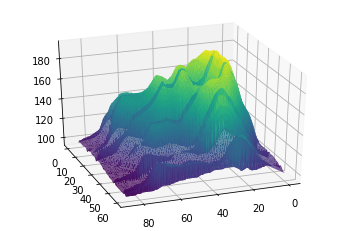

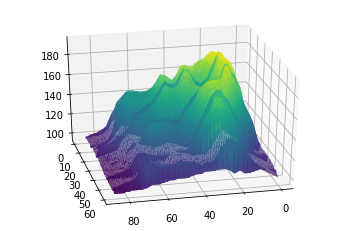

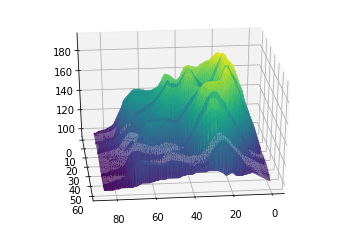

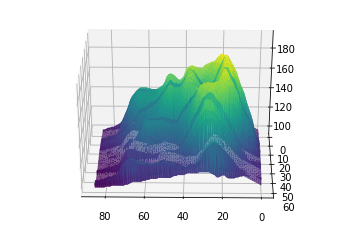

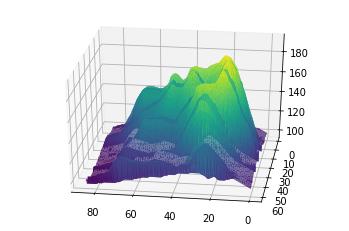

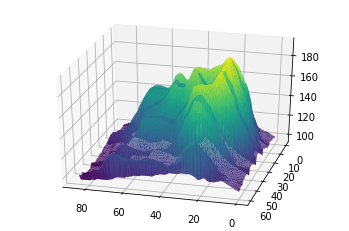

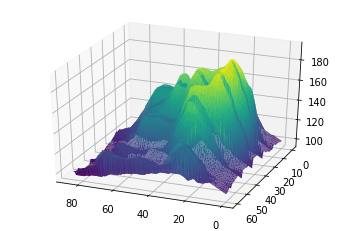

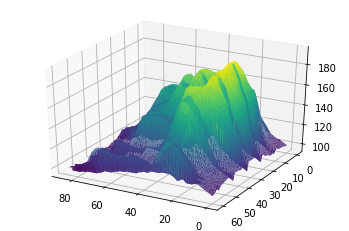

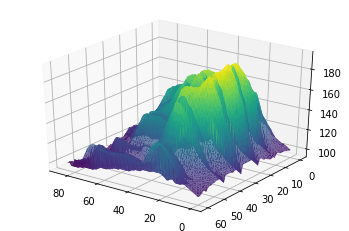

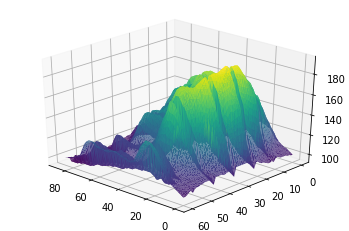

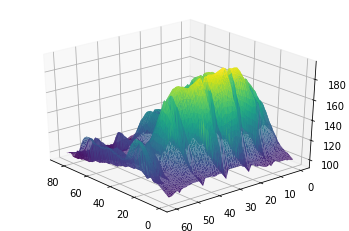

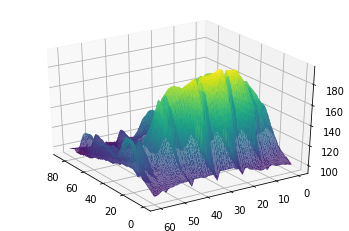

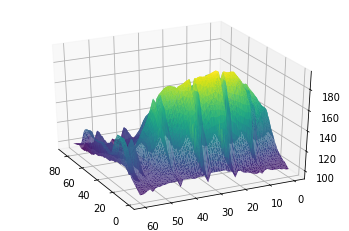

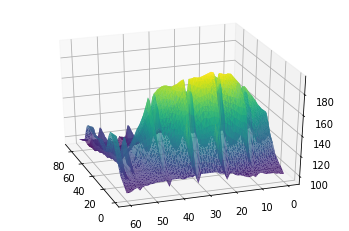

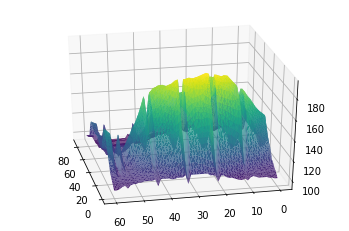

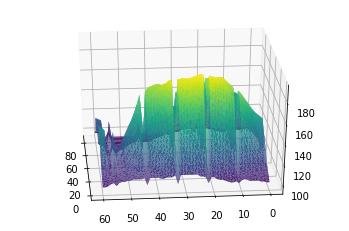

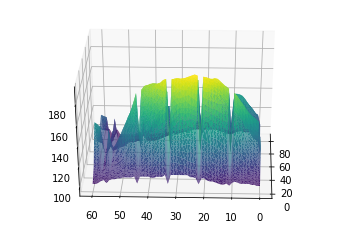

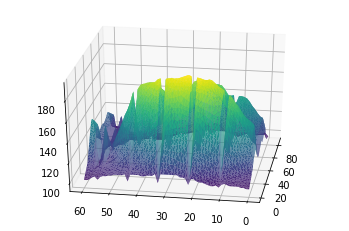

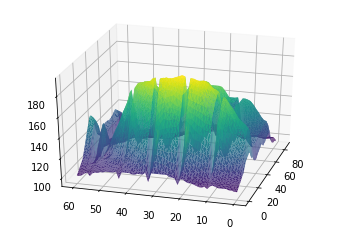

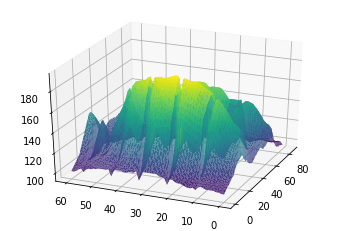

In [13]:
# We are going to do 20 plots, for 20 different angles
for angle in range(70, 210, 7):

# Make the plot
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    ax.plot_trisurf(df['Y'], df['X'], df['Z'], cmap=plt.cm.viridis, linewidth=0.2)

    ax.view_init(30, angle)

    filename='pics/Volcano_step'+str(angle)+'.png'
    plt.savefig(filename, dpi=96)
    plt.gca()

This will create multiple PNG files in the Volcano folder. Now, use ImageMagick to transform them into animation. Open Terminal and navigate to the Volcano folder and enter the following command:

`magick -delay 10 Volcano*.png animated_scatter.gif`

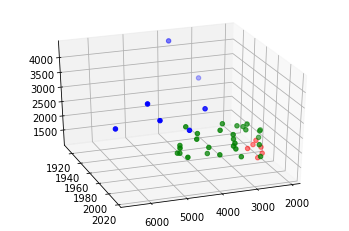

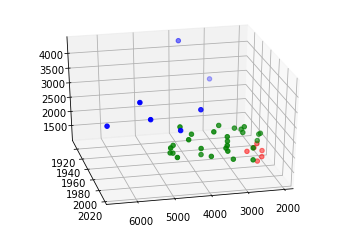

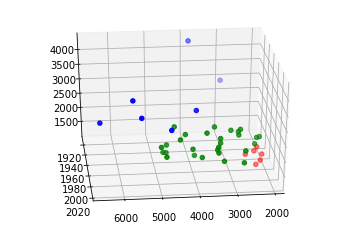

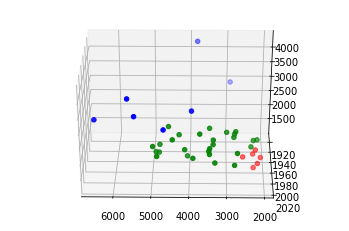

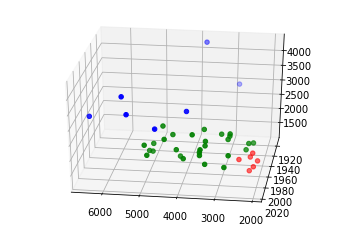

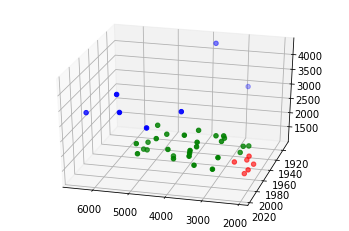

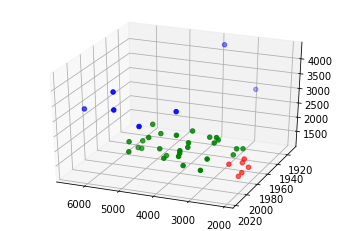

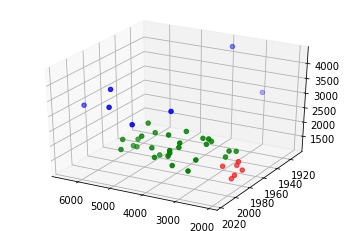

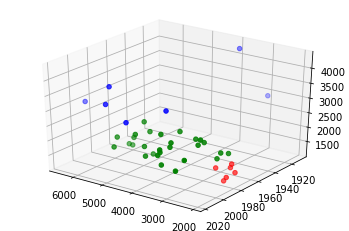

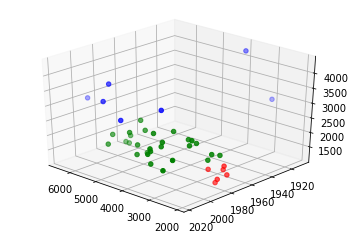

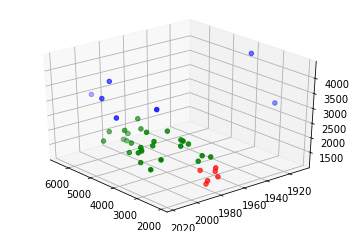

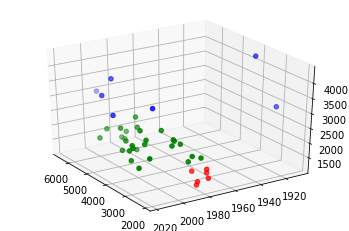

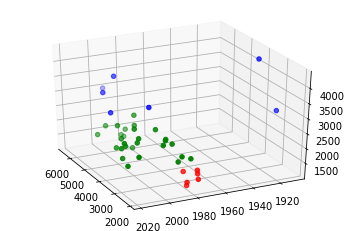

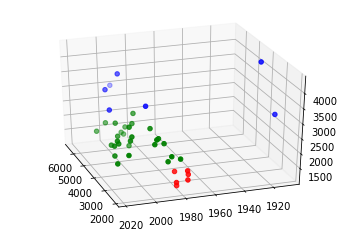

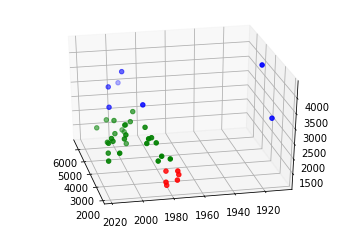

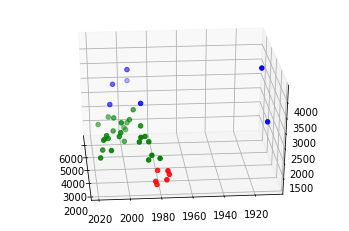

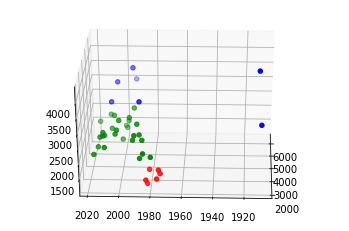

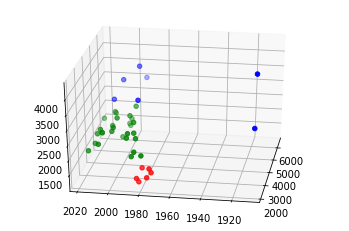

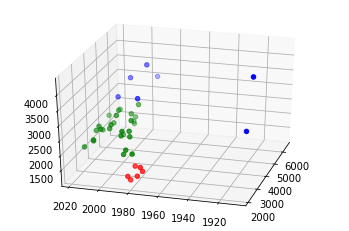

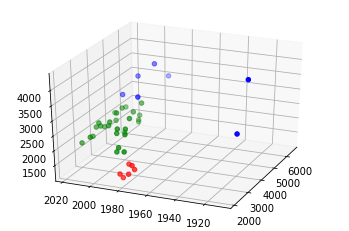

In [16]:
# We are going to do 20 plots, for 20 different angles
for angle in range(70, 210, 7):

# Make the plot
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    ax.scatter(morethan2k['PID'], morethan2k['YEAR_BUILT'], morethan2k['CURRENT_LAND_VALUE']/2e6,c=c_list)

    ax.view_init(30, angle)

    filename='pics/Scatter_step'+str(angle)+'.png'
    plt.savefig(filename, dpi=96)
    plt.gca()

In [17]:
from IPython.display import Image
Image(url='pics/animated_scatter.gif')

## Display 3d-Scatter with Plotly Express

In [12]:
df_plotly = morethan2k.copy()
df_plotly['CURRENT_LAND_VALUE'] = df_plotly['CURRENT_LAND_VALUE']/2e6
df_plotly['COLOR'] = c_list

In [13]:
df_plotly.head()

,YEAR_BUILT,PID,CURRENT_LAND_VALUE,COLOR
18,1910.0,2910,2917.513402,b
20,1912.0,3826,4321.246108,b
82,1974.0,2290,1513.965702,r
83,1975.0,2224,1670.616803,r
84,1976.0,2082,1427.859501,r


In [16]:
import plotly_express as px

px.scatter_3d(df_plotly, x="PID", y="YEAR_BUILT", z="CURRENT_LAND_VALUE", color="COLOR", 
              size="CURRENT_LAND_VALUE", hover_name="PID", symbol="COLOR",
              color_discrete_map = {"b": "blue", "r": "red", "g":"green"})

---